In [1]:
#  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load Your Data (Assuming you already have it loaded as 'data')

data = pd.read_csv('../Data/Augmented_Combined_data.csv', parse_dates=['Time'], index_col='Time')

In [3]:
# Split Original & Augmented
original_data = data[data['augmented'] == 0]
augmented_data = data[data['augmented'] != 0]

In [4]:
len(augmented_data), len(original_data), len(augmented_data)+len(original_data)

(876000, 175200, 1051200)

In [5]:
#  Numeric Columns
exclude_cols = ['Location', 'augmented']
numeric_cols = [col for col in data.columns if col not in exclude_cols]


In [6]:
#  Descriptive Statistics Comparison
# ==============================================
print("===== Descriptive Statistics: ORIGINAL =====")
display(original_data[numeric_cols].describe())
print("===== Descriptive Statistics: AUGMENTED =====")
display(augmented_data[numeric_cols].describe())

===== Descriptive Statistics: ORIGINAL =====


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000
mean,46.655994,70.155291,36.516241,4.157639,6.879334,201.589446,201.539070,8.038205,0.303429
std,22.012738,17.326678,20.933153,2.012682,3.043964,99.639040,100.683777,3.617488,0.257325
min,-31.200000,9.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,30.200000,57.000000,21.900000,2.630000,4.700000,130.000000,129.000000,5.300000,0.087700
50%,46.900000,72.000000,36.200000,3.850000,6.680000,211.000000,211.000000,7.600000,0.233100
75%,65.300000,84.000000,54.600000,5.380000,8.800000,288.000000,290.000000,10.300000,0.474200
max,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.999400


===== Descriptive Statistics: AUGMENTED =====


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000,876000.000000
mean,47.216437,69.972360,35.536520,4.169914,7.042256,201.589446,201.539070,8.006373,0.303429
std,22.523771,17.485714,20.448247,2.049136,3.138323,99.638812,100.683547,3.649090,0.257324
min,-31.559546,8.810378,-37.608544,-0.023484,-0.023605,1.000000,0.000000,0.436673,0.000000
25%,30.427294,57.098867,21.227670,2.624579,4.796371,130.000000,129.000000,5.219739,0.087700
50%,47.369749,71.711565,35.284303,3.844644,6.823102,211.000000,211.000000,7.540346,0.233100
75%,65.875327,84.160736,52.890652,5.386205,9.005553,288.000000,290.000000,10.250870,0.474200
max,118.006697,106.063224,81.721731,20.164220,28.272812,360.000000,360.000000,30.856161,0.999400


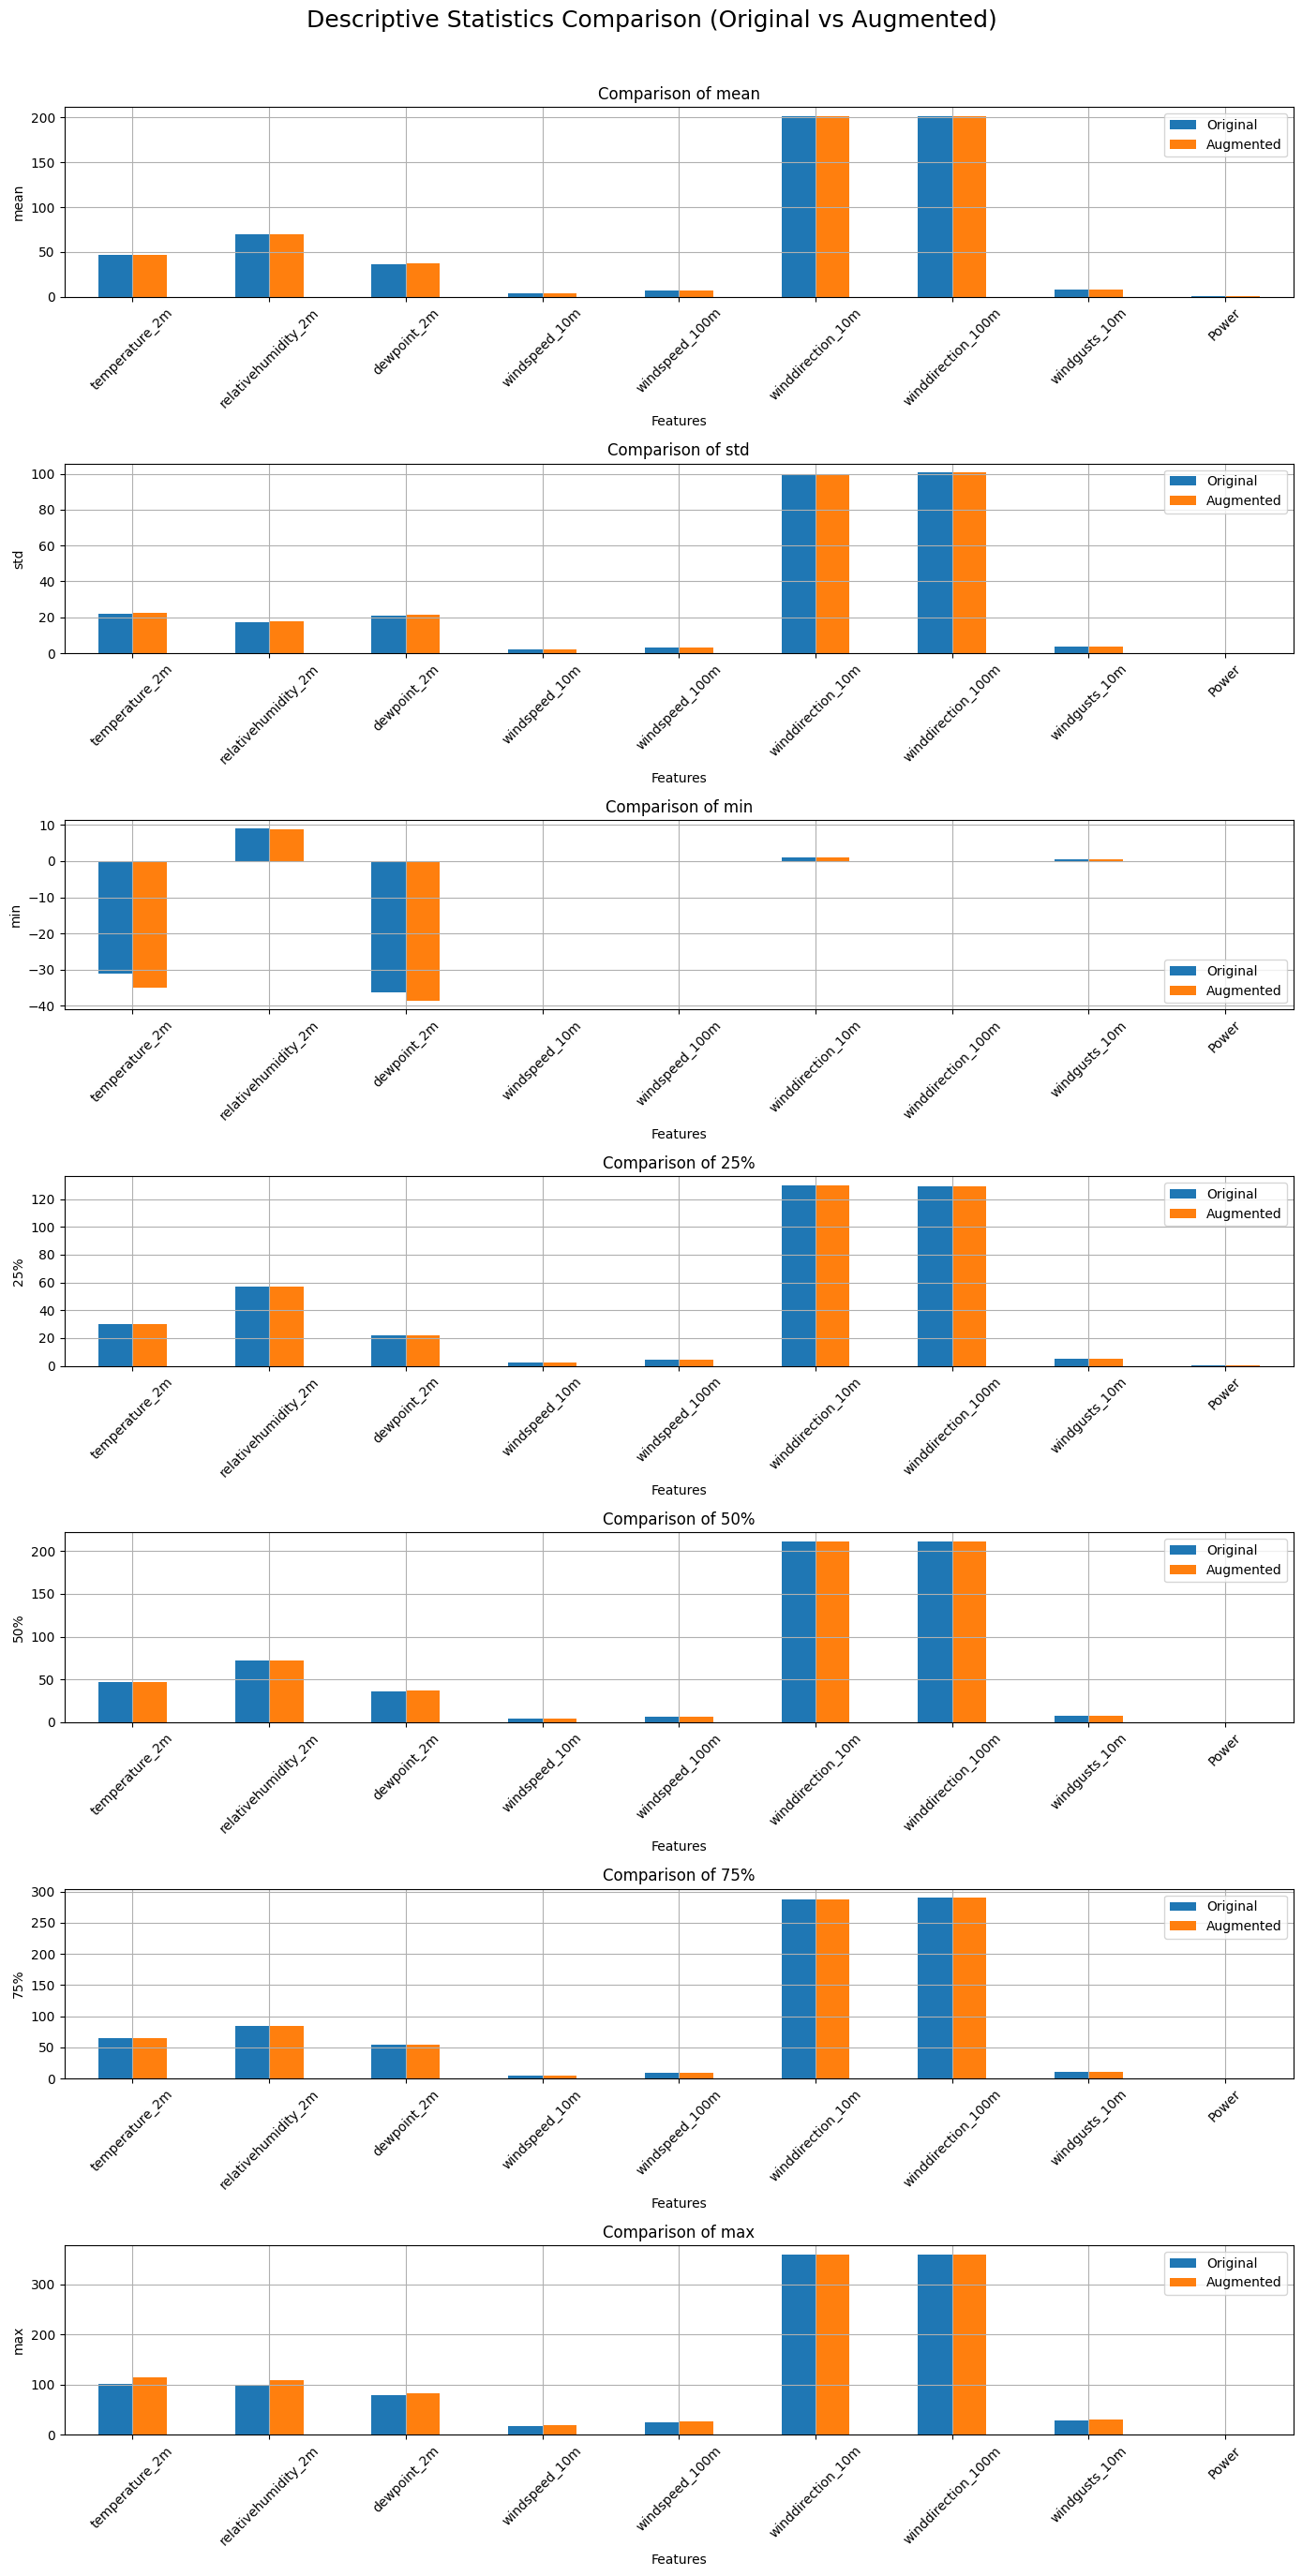

In [9]:
# Create dataframes of descriptive stats for both
original_stats = original_data[numeric_cols].describe()
augmented_stats = augmented_data[numeric_cols].describe()

metrics_to_plot = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Create subplots
fig, axs = plt.subplots(len(metrics_to_plot), 1, figsize=(14, 4 * len(metrics_to_plot)))

for i, metric in enumerate(metrics_to_plot):
    comparison_df = pd.DataFrame({
        'Original': original_stats.loc[metric],
        'Augmented': augmented_stats.loc[metric]
    })
    comparison_df.plot(kind='bar', ax=axs[i], color=['#1f77b4', '#ff7f0e'])
    axs[i].set_title(f"Comparison of {metric}")
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel('Features')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)

plt.suptitle("Descriptive Statistics Comparison (Original vs Augmented)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [10]:
# % Difference
diff = (augmented_data[numeric_cols].describe() - original_data[numeric_cols].describe()) / original_data[numeric_cols].describe() * 100
print("===== % Difference (Augmented vs Original) =====")
display(diff)

===== % Difference (Augmented vs Original) =====


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,0.994434,0.200327,1.291202,-2.608701,0.157063,0.000000,0.000000,-0.949105,-1.829460e-14
std,2.402239,3.048275,1.794509,-2.001893,1.109286,-0.000228,-0.000228,-0.496635,-2.283110e-04
min,11.860886,-3.668698,6.646786,-inf,-inf,0.000000,NaN,-8.364923,NaN
25%,0.566227,0.357394,1.035998,-2.742424,-0.287497,0.000000,0.000000,-1.748427,0.000000e+00
50%,0.603241,-0.181328,1.015055,-2.817198,-0.142311,0.000000,0.000000,-1.093969,0.000000e+00
75%,0.397687,0.671461,0.887558,-2.745216,0.157006,0.000000,0.000000,-1.083398,0.000000e+00
max,13.338507,10.026294,6.191403,3.197459,7.148992,0.000000,0.000000,7.201366,0.000000e+00


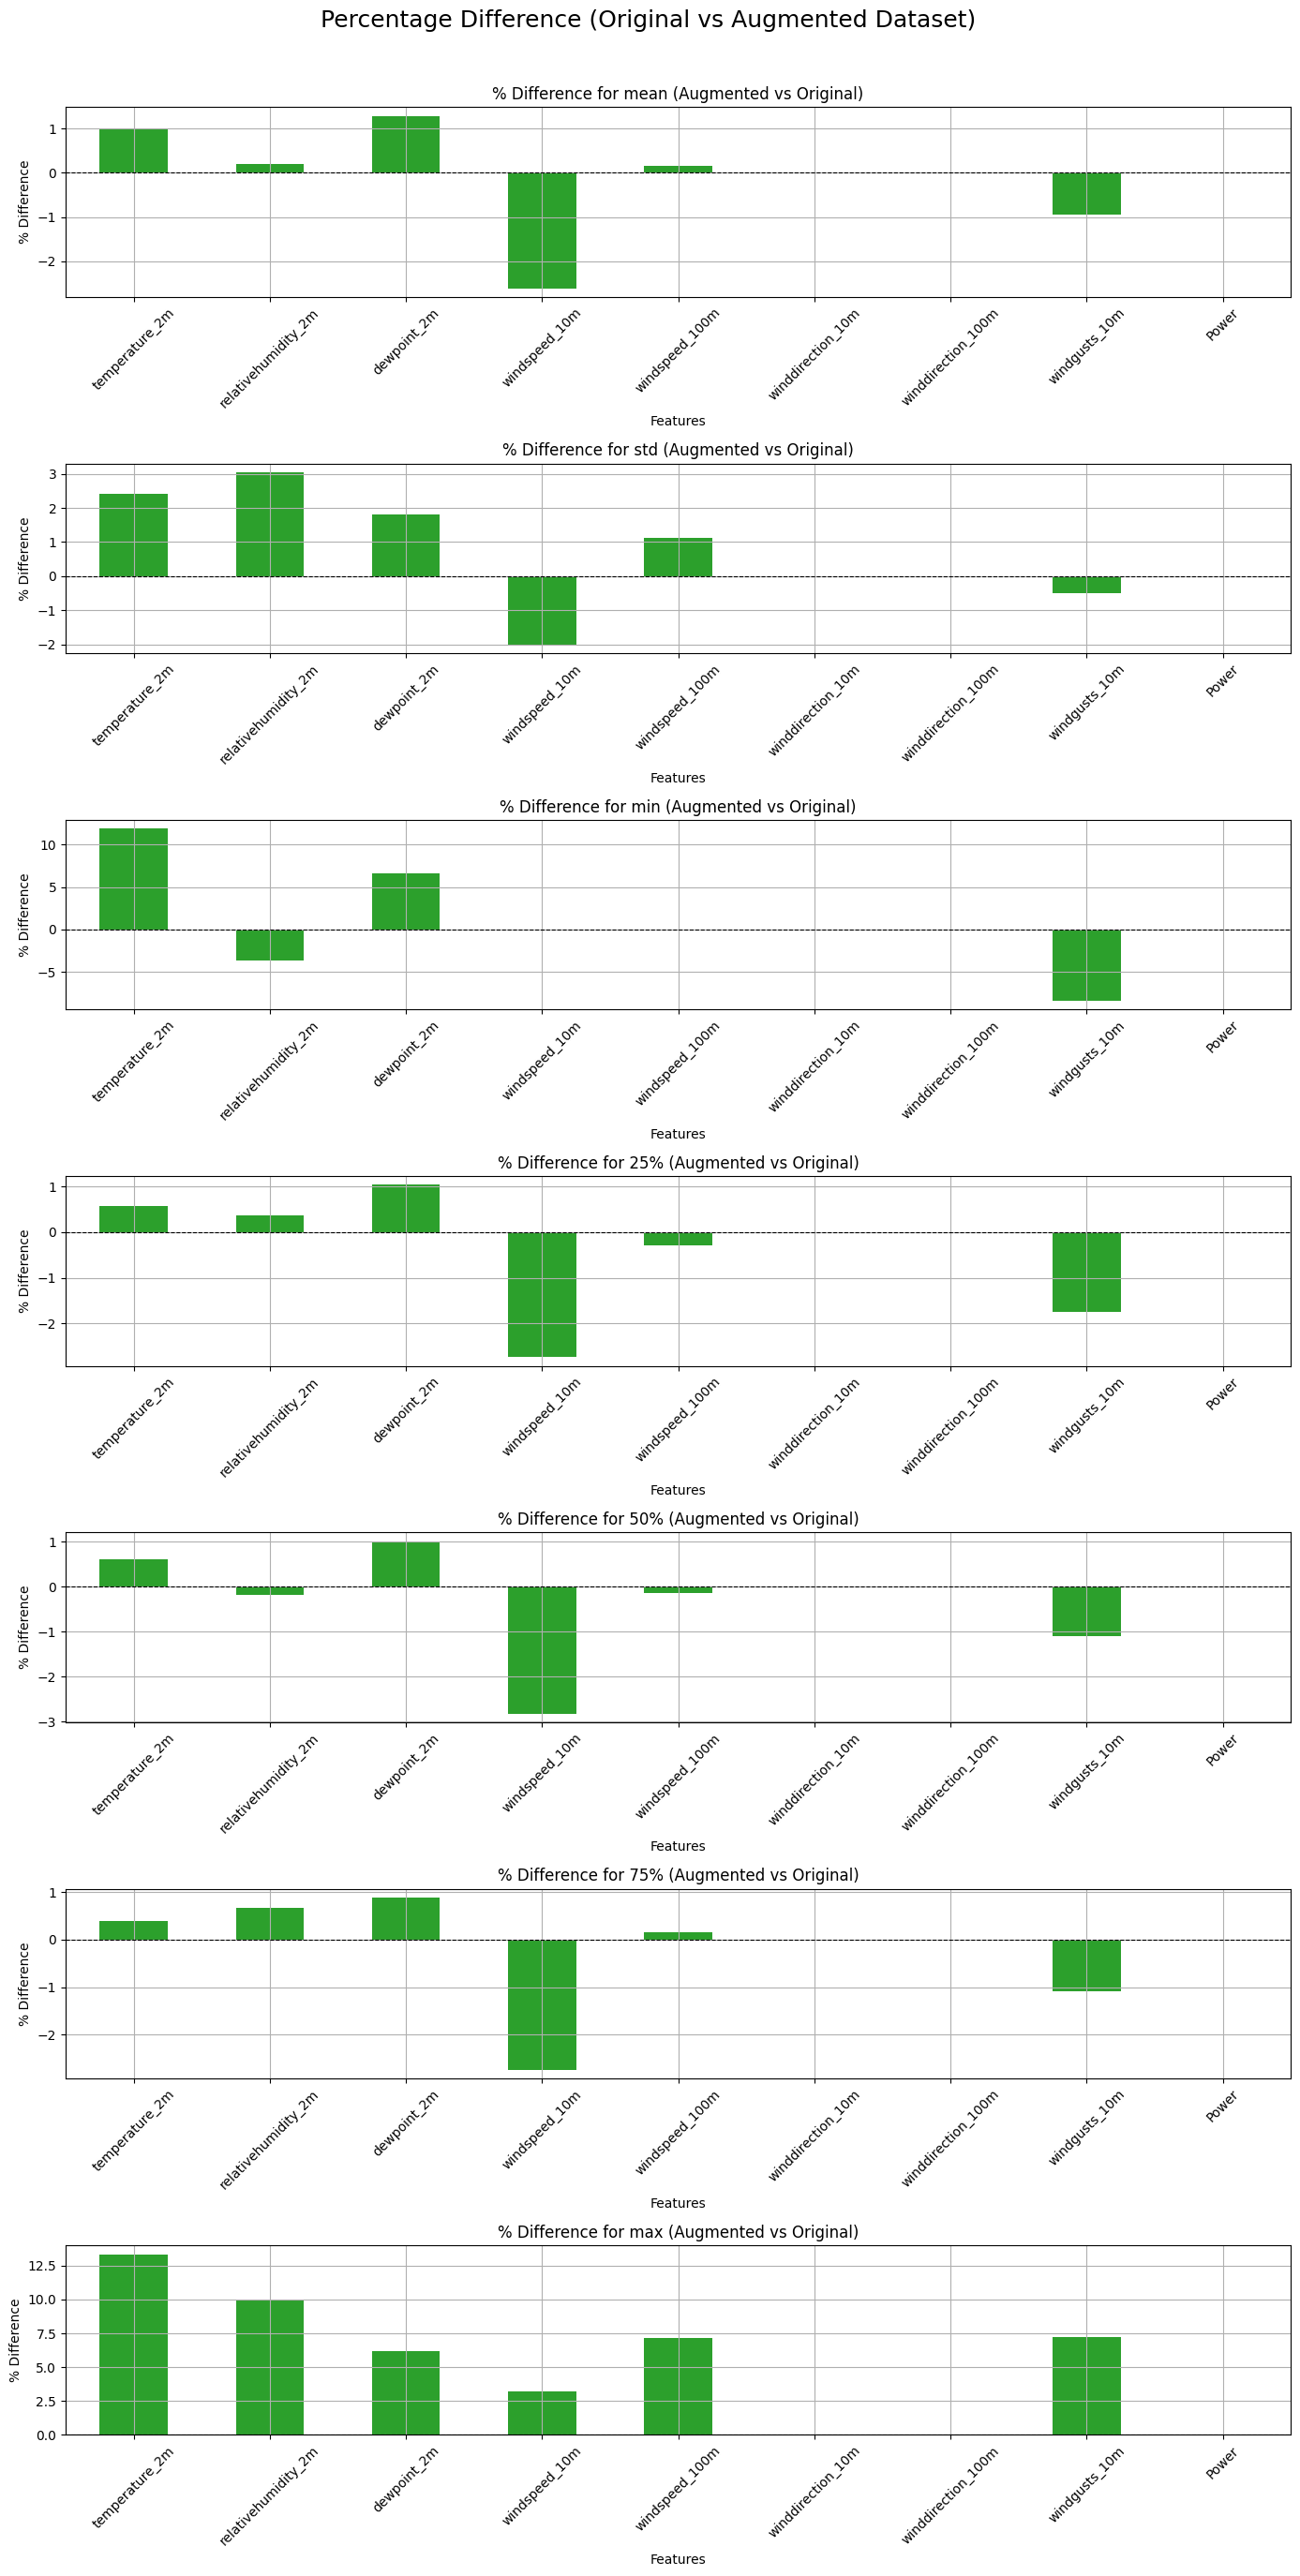

In [11]:
diff = (augmented_stats - original_stats) / original_stats * 100
metrics_to_plot = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Create subplots
fig, axs = plt.subplots(len(metrics_to_plot), 1, figsize=(14, 4 * len(metrics_to_plot)))

for i, metric in enumerate(metrics_to_plot):
    values = diff.loc[metric]
    values.plot(kind='bar', ax=axs[i], color='#2ca02c')
    axs[i].set_title(f"% Difference for {metric} (Augmented vs Original)")
    axs[i].set_ylabel('% Difference')
    axs[i].set_xlabel('Features')
    axs[i].axhline(0, color='black', linewidth=0.8, linestyle='--')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)

plt.suptitle("Percentage Difference (Original vs Augmented Dataset)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

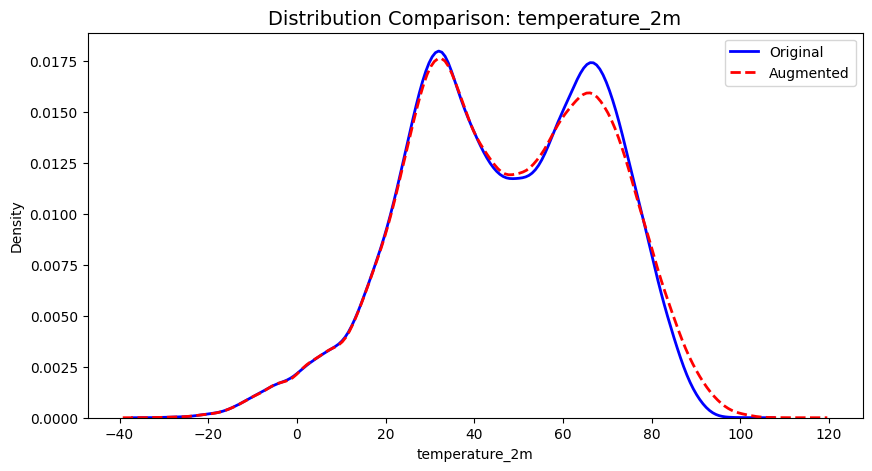

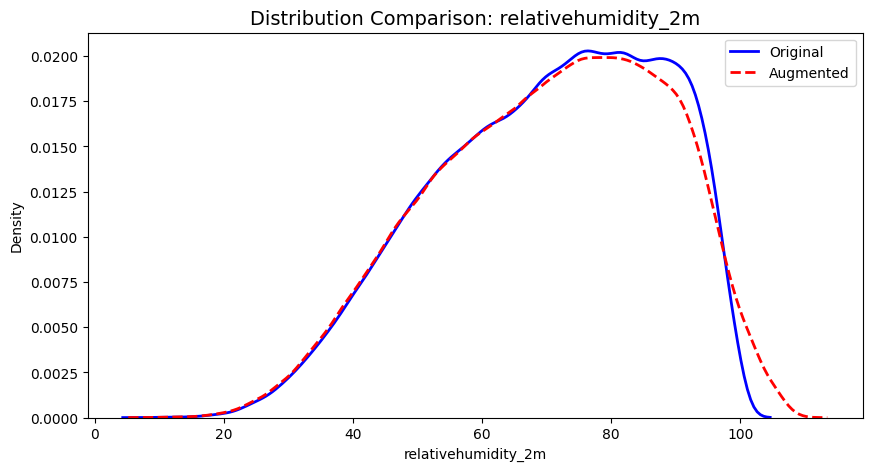

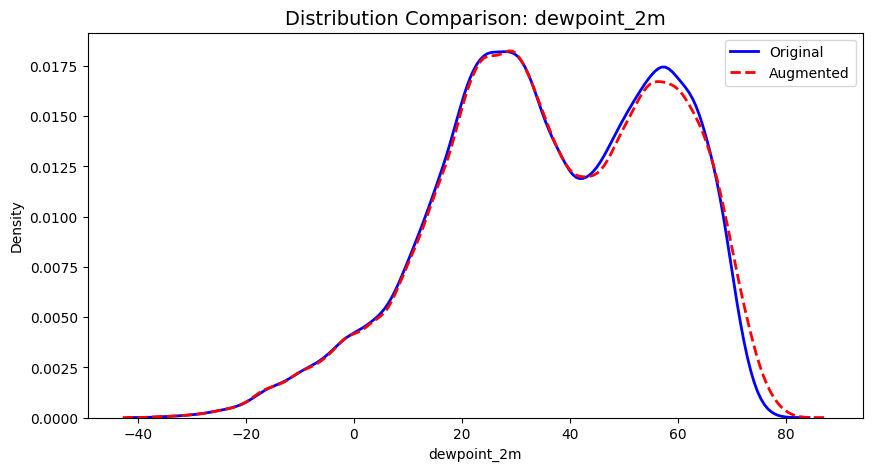

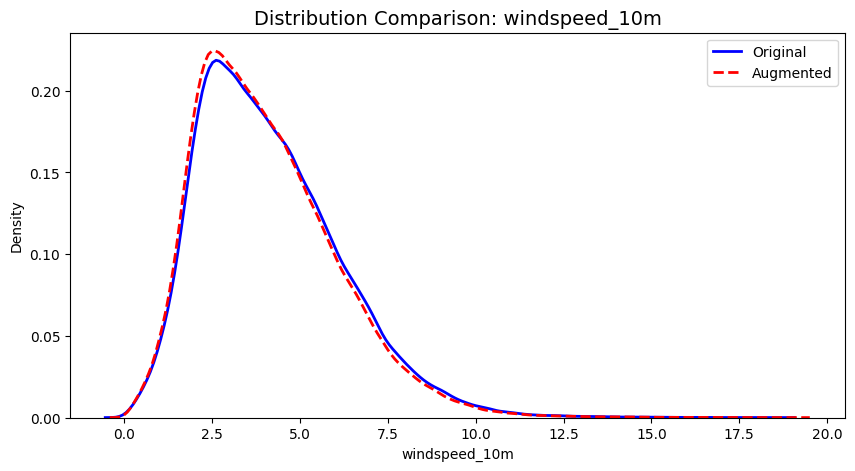

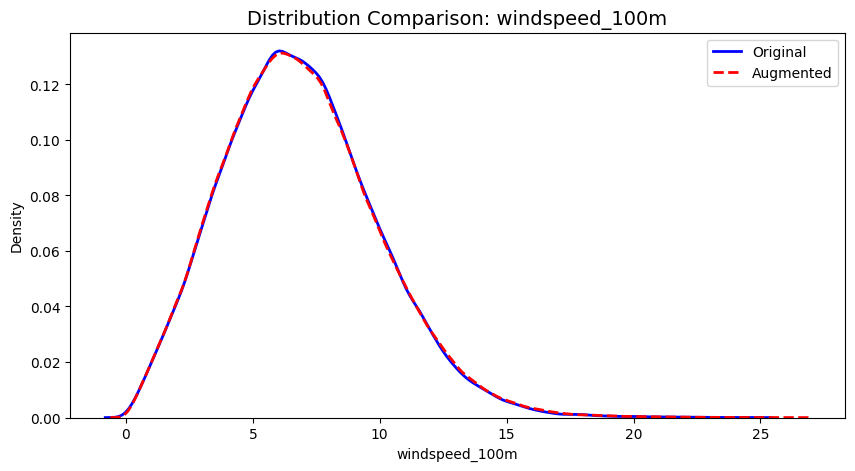

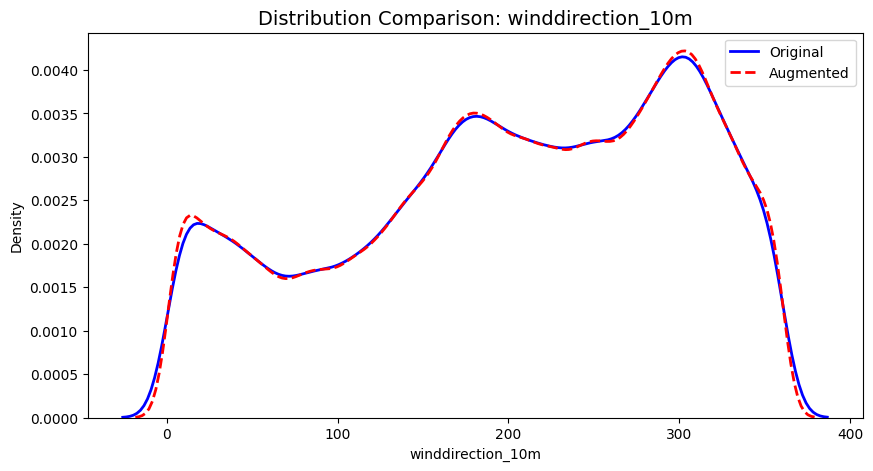

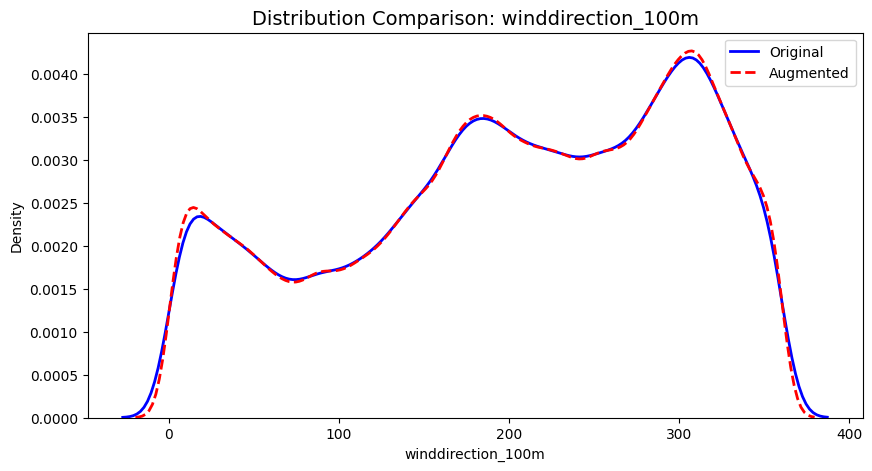

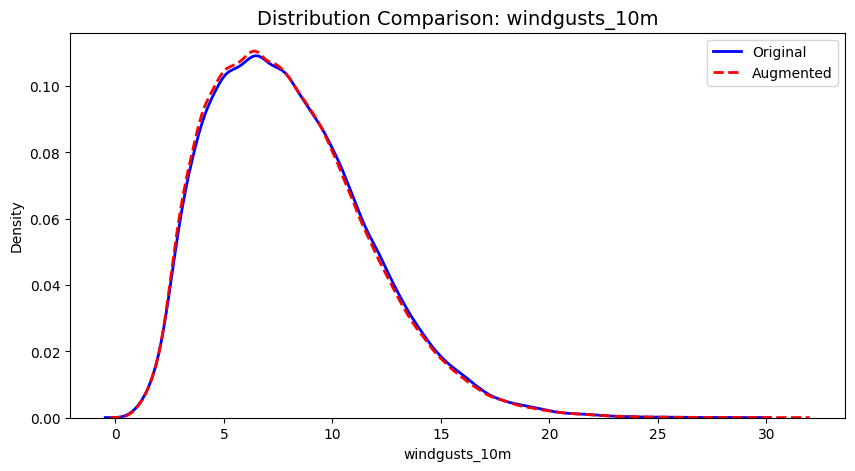

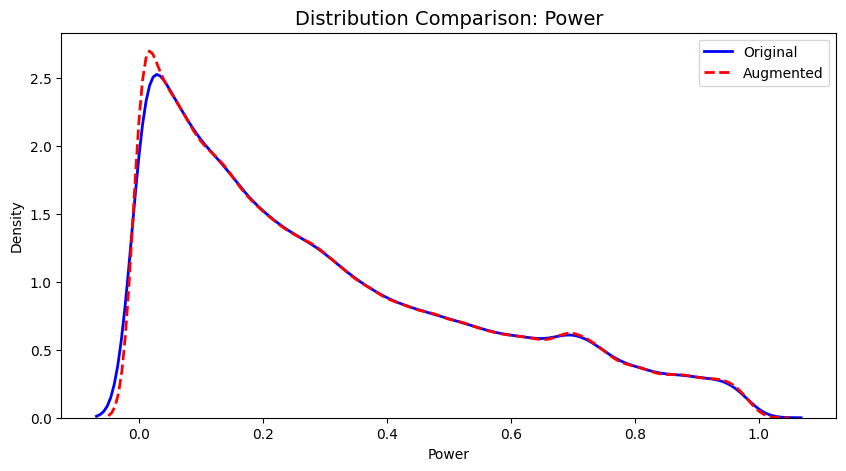

In [8]:
# ==============================================
#  Distributions Comparison
# ==============================================
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.kdeplot(original_data[col], label='Original', color='blue', linewidth=2)
    sns.kdeplot(augmented_data[col], label='Augmented', color='red', linestyle='--', linewidth=2)
    plt.title(f'Distribution Comparison: {col}', fontsize=14)
    plt.legend()
    plt.show()

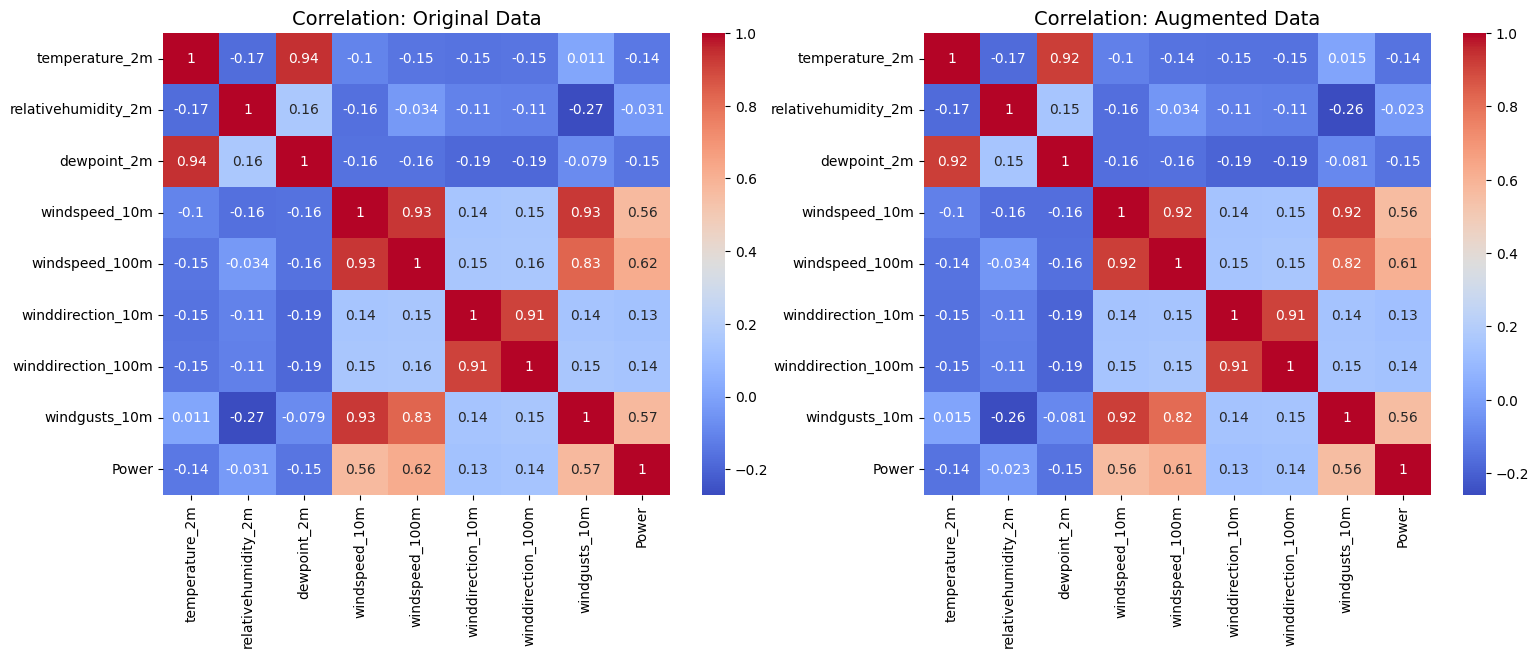

In [9]:
# ==============================================
#  Correlation Heatmap Comparison
# ==============================================
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.heatmap(original_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Original Data", fontsize=14)

plt.subplot(1,2,2)
sns.heatmap(augmented_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Augmented Data", fontsize=14)

plt.show()

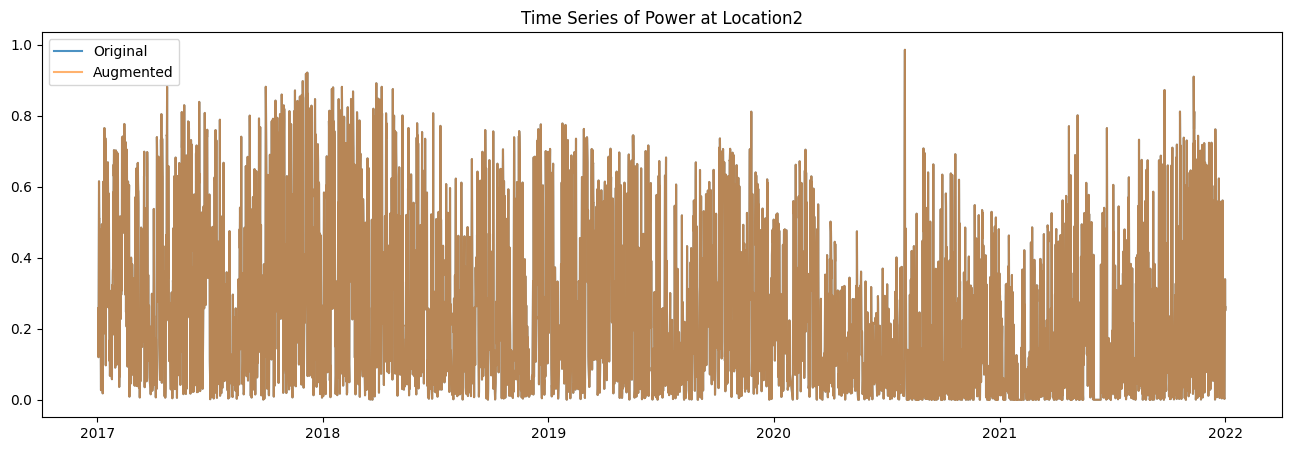

In [11]:
# ==============================================
# Time Series Plot for one location
# ==============================================
loc = 'Location2'  # Change or loop over locations if needed

plt.figure(figsize=(16,5))
plt.plot(original_data[original_data['Location'] == loc]['Power'], label='Original', alpha=0.8)
plt.plot(augmented_data[augmented_data['Location'] == loc]['Power'], label='Augmented', alpha=0.6)
plt.title(f"Time Series of Power at {loc}")
plt.legend()
plt.show()

<Figure size 1200x400 with 0 Axes>

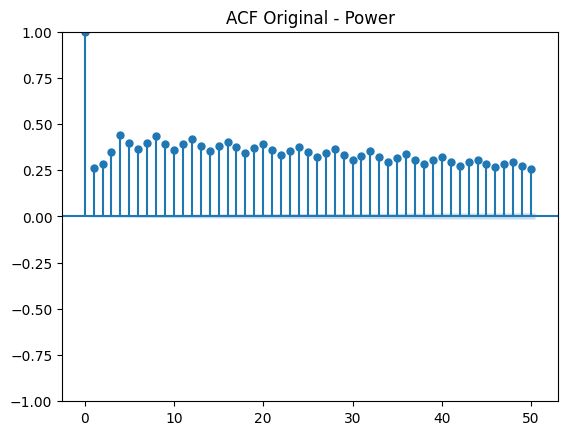

<Figure size 1200x400 with 0 Axes>

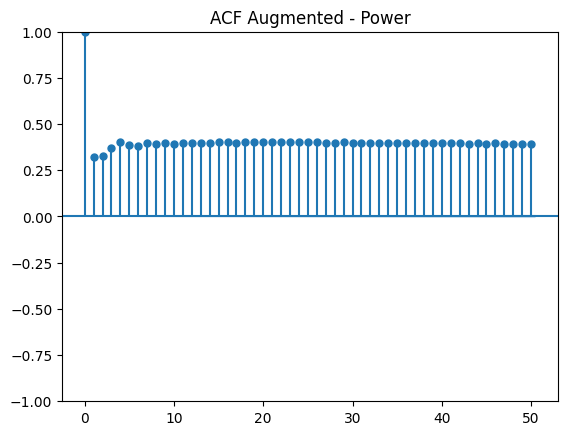

<Figure size 1200x400 with 0 Axes>

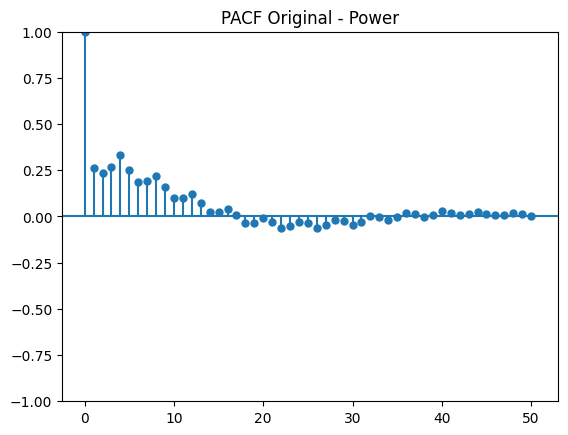

<Figure size 1200x400 with 0 Axes>

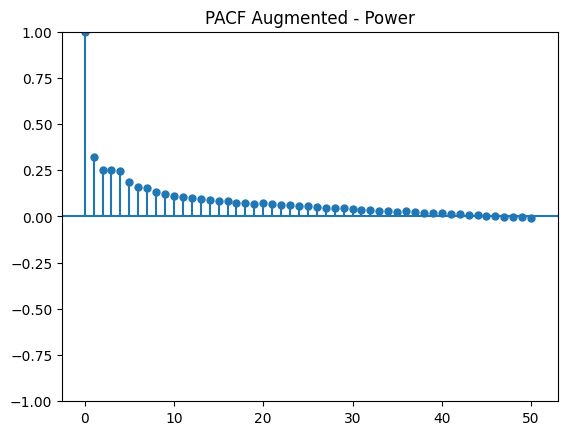

In [13]:
# ==============================================
# Autocorrelation & PACF
# ==============================================
plt.figure(figsize=(12,4))
plot_acf(original_data['Power'], lags=50, title="ACF Original - Power")
plt.show()

plt.figure(figsize=(12,4))
plot_acf(augmented_data['Power'], lags=50, title="ACF Augmented - Power")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(original_data['Power'], lags=50, title="PACF Original - Power")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(augmented_data['Power'], lags=50, title="PACF Augmented - Power")
plt.show()

<Figure size 1200x400 with 0 Axes>

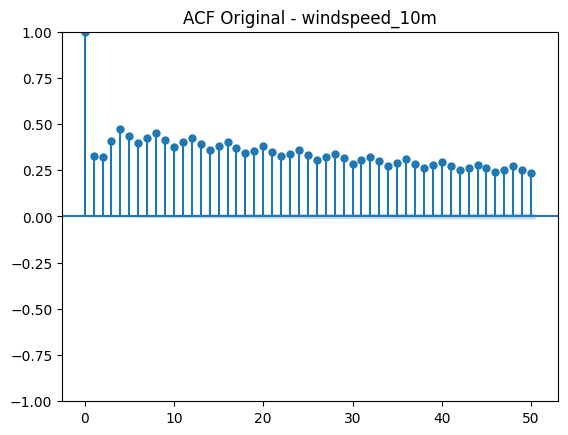

<Figure size 1200x400 with 0 Axes>

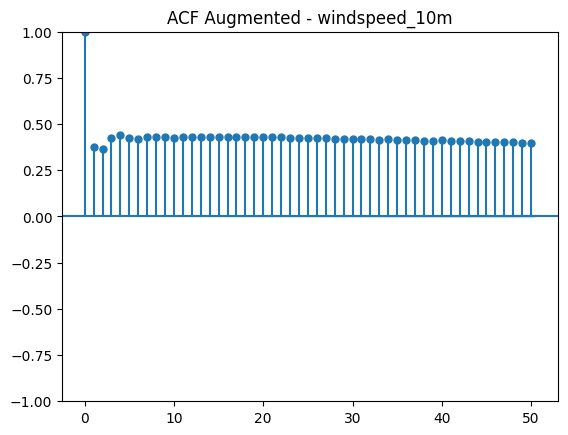

<Figure size 1200x400 with 0 Axes>

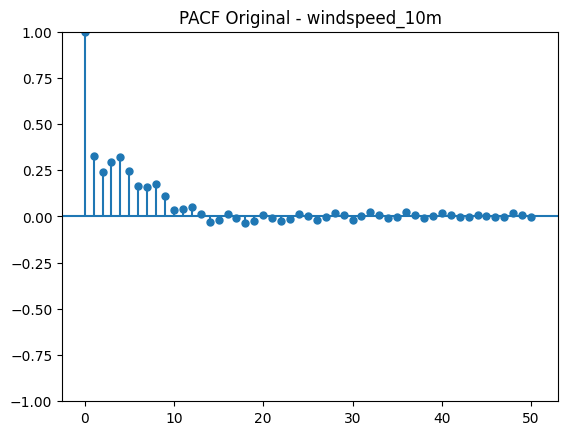

<Figure size 1200x400 with 0 Axes>

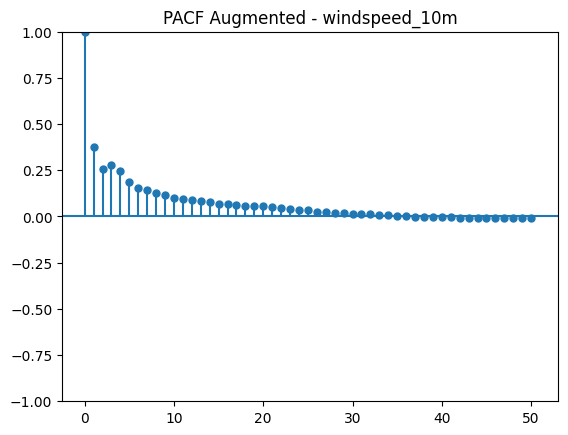

In [7]:
# ==============================================
# Autocorrelation & PACF
# ==============================================
plt.figure(figsize=(12,4))
plot_acf(original_data['windspeed_10m'], lags=50, title="ACF Original - windspeed_10m")
plt.show()

plt.figure(figsize=(12,4))
plot_acf(augmented_data['windspeed_10m'], lags=50, title="ACF Augmented - windspeed_10m")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(original_data['windspeed_10m'], lags=50, title="PACF Original - windspeed_10m")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(augmented_data['windspeed_10m'], lags=50, title="PACF Augmented - windspeed_10m")
plt.show()

<Figure size 1200x400 with 0 Axes>

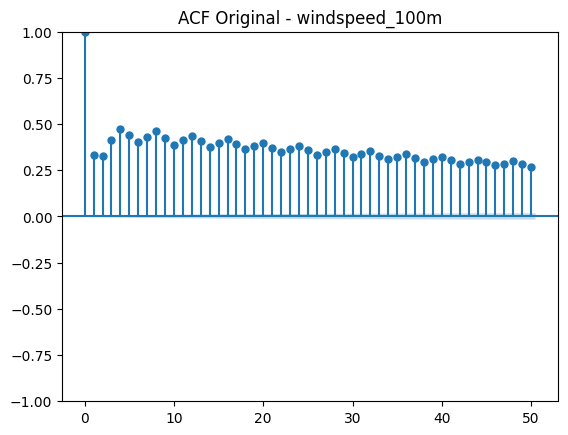

<Figure size 1200x400 with 0 Axes>

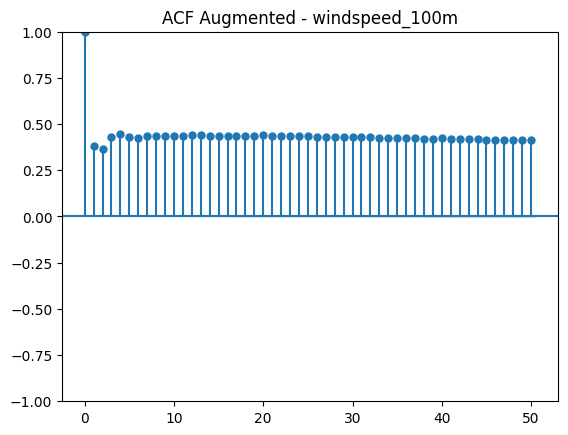

<Figure size 1200x400 with 0 Axes>

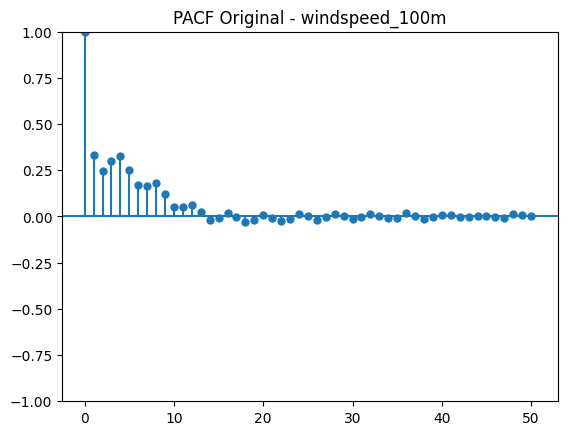

<Figure size 1200x400 with 0 Axes>

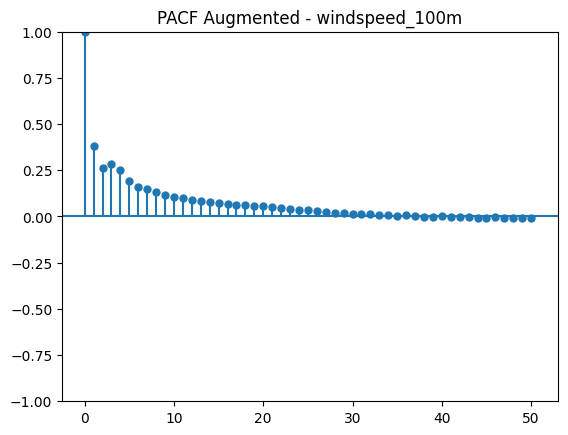

In [8]:
# ==============================================
# Autocorrelation & PACF
# ==============================================
plt.figure(figsize=(12,4))
plot_acf(original_data['windspeed_100m'], lags=50, title="ACF Original - windspeed_100m")
plt.show()

plt.figure(figsize=(12,4))
plot_acf(augmented_data['windspeed_100m'], lags=50, title="ACF Augmented - windspeed_100m")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(original_data['windspeed_100m'], lags=50, title="PACF Original - windspeed_100m")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(augmented_data['windspeed_100m'], lags=50, title="PACF Augmented - windspeed_100m")
plt.show()

<Figure size 1200x400 with 0 Axes>

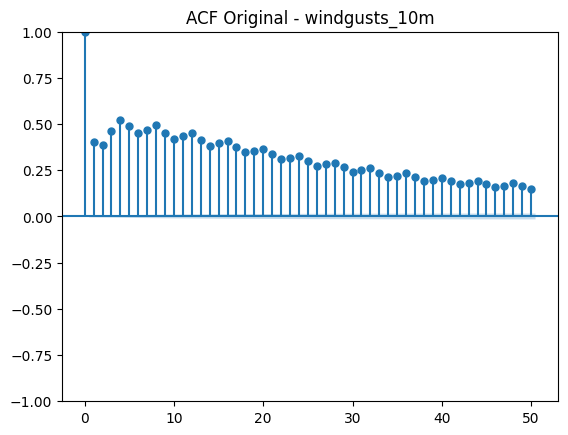

<Figure size 1200x400 with 0 Axes>

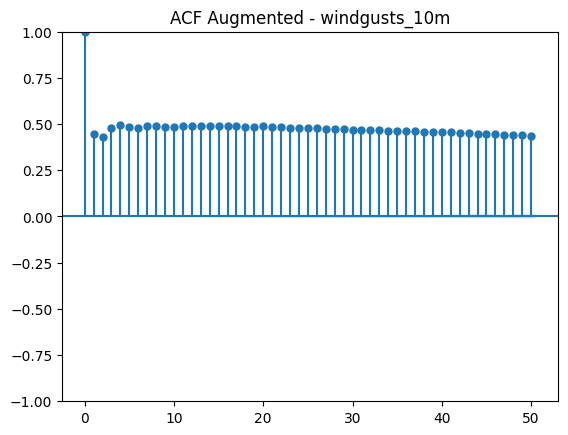

<Figure size 1200x400 with 0 Axes>

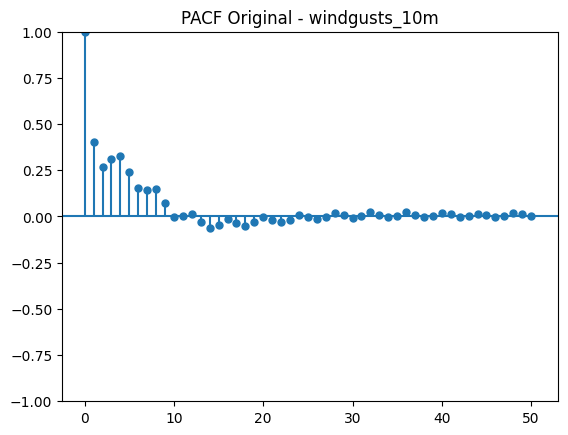

<Figure size 1200x400 with 0 Axes>

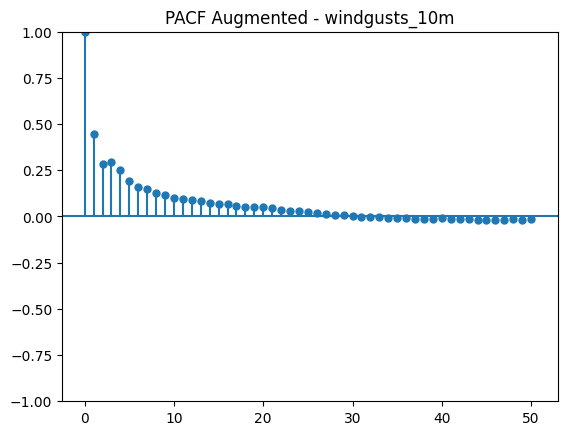

In [9]:
# ==============================================
# Autocorrelation & PACF
# ==============================================
plt.figure(figsize=(12,4))
plot_acf(original_data['windgusts_10m'], lags=50, title="ACF Original - windgusts_10m")
plt.show()

plt.figure(figsize=(12,4))
plot_acf(augmented_data['windgusts_10m'], lags=50, title="ACF Augmented - windgusts_10m")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(original_data['windgusts_10m'], lags=50, title="PACF Original - windgusts_10m")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(augmented_data['windgusts_10m'], lags=50, title="PACF Augmented - windgusts_10m")
plt.show()

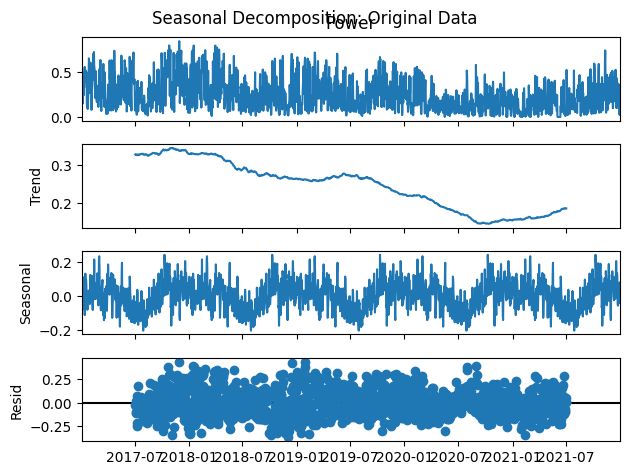

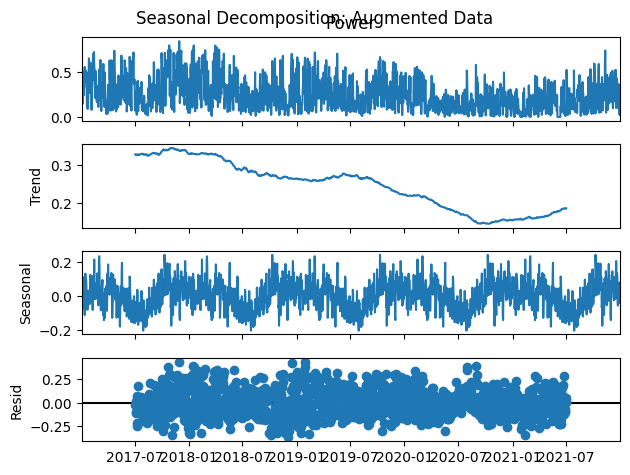

In [16]:
# ==============================================
# Seasonal Decomposition (Optional)
# ==============================================
# Sampling one location
# Only select Power column directly after filtering location
ts_orig = original_data[original_data['Location'] == loc].resample('D')['Power'].mean()
ts_aug  = augmented_data[augmented_data['Location'] == loc].resample('D')['Power'].mean()


result_orig = seasonal_decompose(ts_orig, model='additive', period=365)
result_aug = seasonal_decompose(ts_aug, model='additive', period=365)

result_orig.plot()
plt.suptitle('Seasonal Decomposition: Original Data')
plt.show()

result_aug.plot()
plt.suptitle('Seasonal Decomposition: Augmented Data')
plt.show()

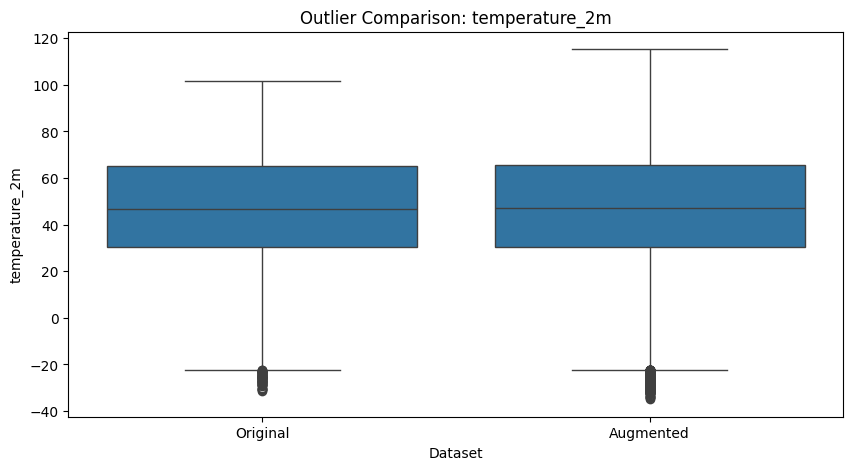

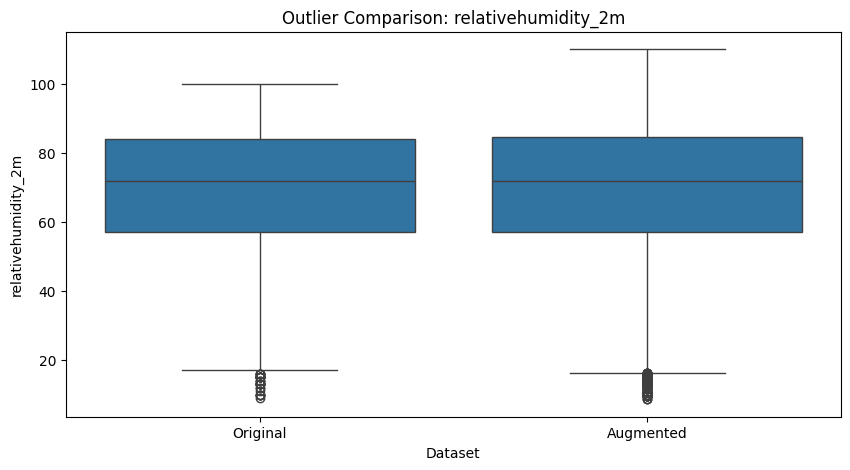

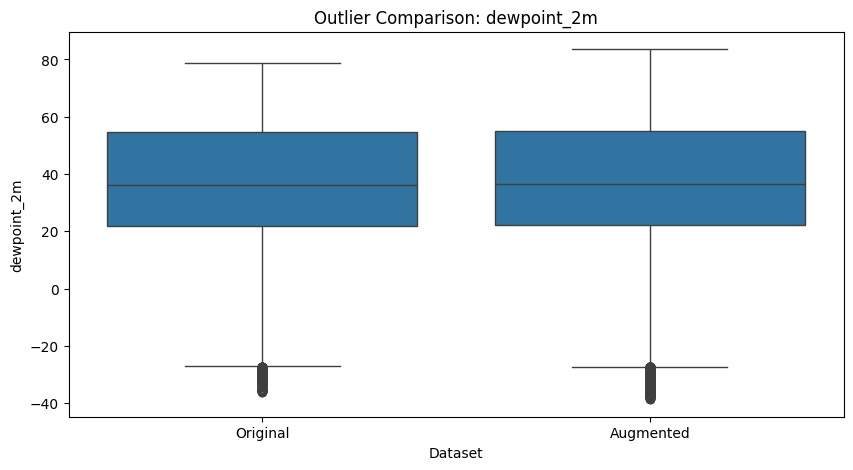

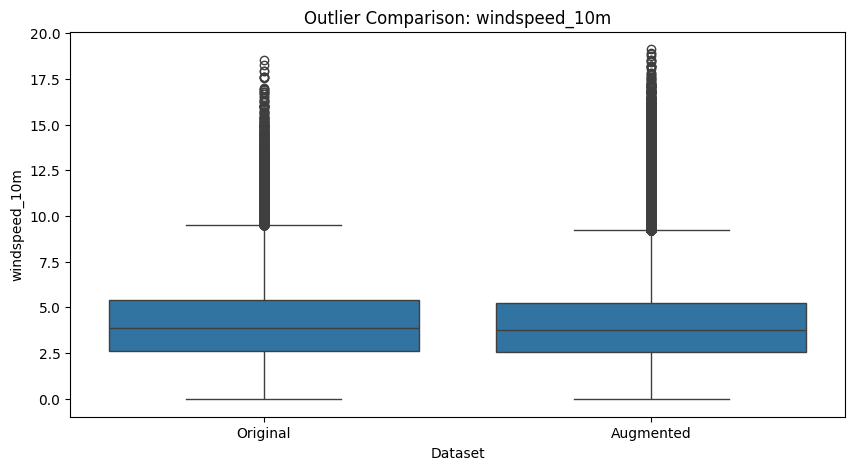

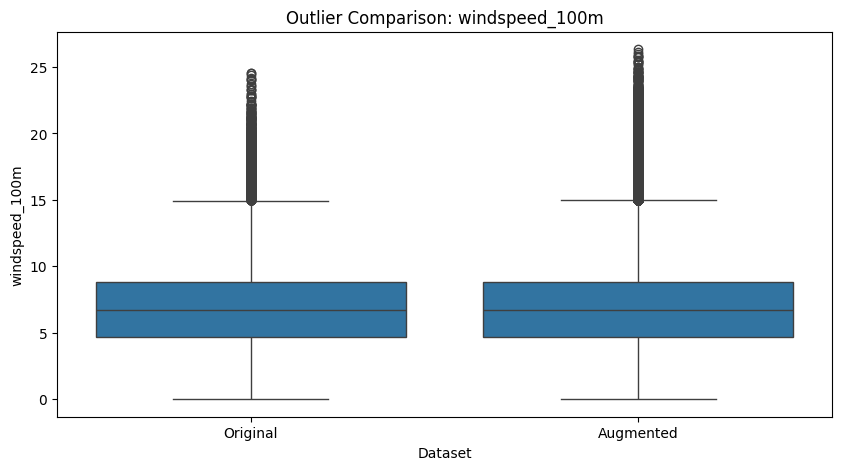

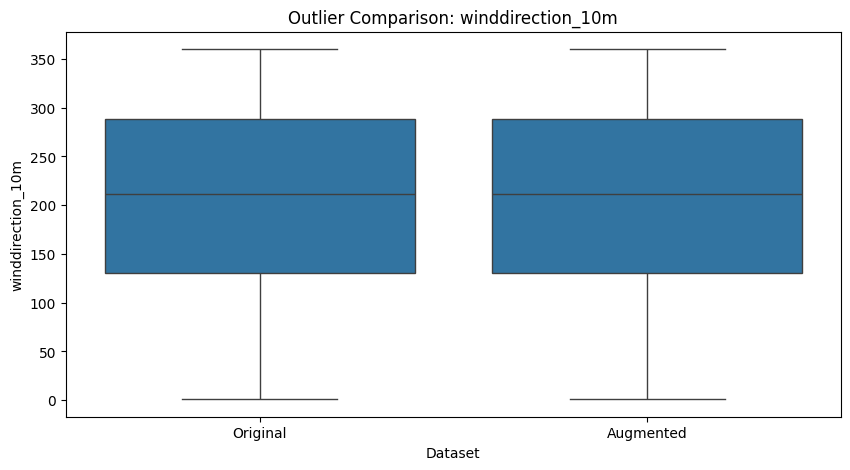

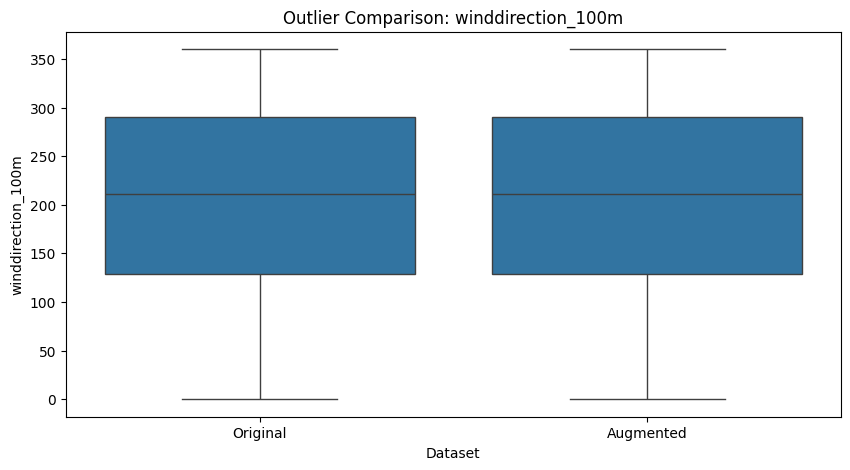

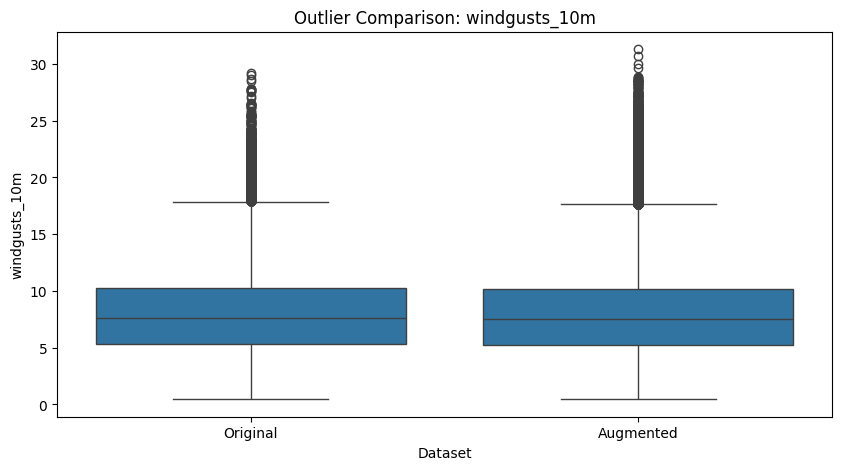

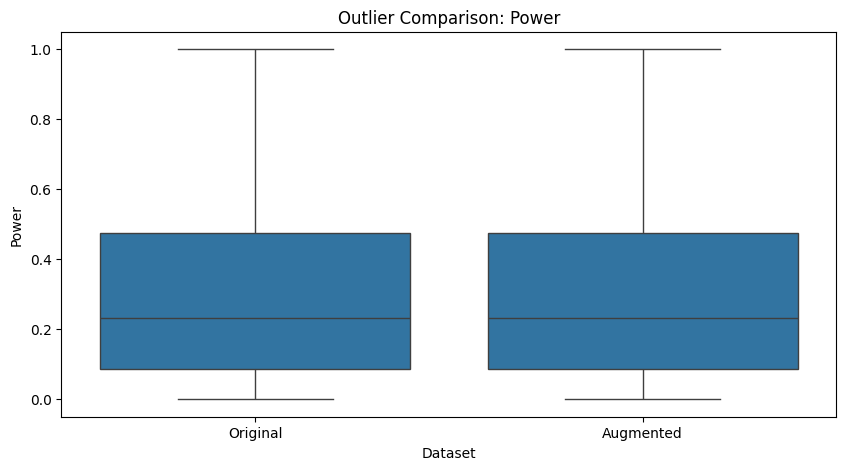

In [15]:
# ==============================================
# Outlier Analysis
# ==============================================
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=pd.concat([original_data[col], augmented_data[col]], keys=['Original', 'Augmented'], names=['Dataset']).reset_index(), 
                x='Dataset', y=col)
    plt.title(f'Outlier Comparison: {col}')
    plt.show()

In [17]:
# ==============================================
# ADF Test for Stationarity
# ==============================================
def adf_test(series, label=''):
    result = adfuller(series)
    print(f'ADF Test for {label}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Result: {"Stationary" if result[1] < 0.05 else "Non-stationary"}\n')

adf_test(original_data['Power'], 'Original Power')
adf_test(augmented_data['Power'], 'Augmented Power')

ADF Test for Original Power
ADF Statistic: -23.4173
p-value: 0.0000
Result: Stationary



: 